In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from utils import *

In [30]:
path = 'activatable promoters/bl/txtl/pulse/'
file = path+'220413_PULSE_BABY_deux.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220413_PULSE_BABY_deux_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx = pd.read_csv(file, skiprows = 68, nrows = 42, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [31]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])

In [32]:
exps

{'0_1': ['A1', 'B1', 'C1'],
 '1_1': ['A2', 'B2', 'C2'],
 '10_1': ['A3', 'B3', 'C3'],
 '0_2': ['A5', 'B5', 'C5'],
 '1_2': ['A6', 'B6', 'C6'],
 '10_2': ['A7', 'B7', 'C7'],
 '0_3': ['A9', 'B9', 'C9'],
 '1_3': ['A10', 'B10', 'C10'],
 '10_3': ['A11', 'B11', 'C11'],
 '1_7': ['C12', 'D12', 'E12'],
 'B-1': ['D1'],
 'B-2': ['D5'],
 'B-3': ['D9'],
 '0_4': ['E1', 'F1', 'G1'],
 '1_4': ['E2', 'F2', 'G2'],
 '10_4': ['E3', 'F3', 'G3'],
 '0_5': ['E5', 'F5', 'G5'],
 '1_5': ['E6', 'F6', 'G6'],
 '10_5': ['E7', 'F7', 'G7'],
 '0_6': ['E9', 'F9', 'G9'],
 '1_6': ['E10', 'F10', 'G10'],
 '10_6': ['E11', 'F11', 'G11'],
 '0_7': ['F12', 'G12', 'H12'],
 'B-4': ['H1'],
 '10_7': ['H5', 'H6', 'H7'],
 'B-6': ['H9']}

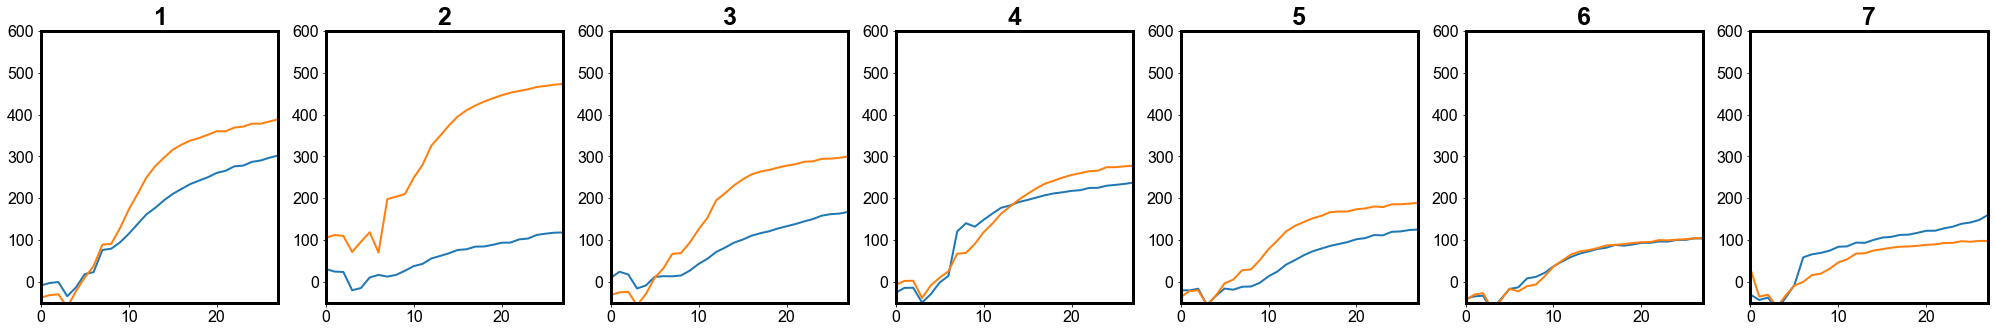

In [70]:
plt.figure(figsize = (40,5))
for i in range(1,8):
    plt.subplot(1,8,i)
    plt.plot(RFPEx[exps['0_'+str(i)]].mean(1)-RFPEx[exps['B-1']].mean(1))
    #plt.plot(RFPEx[exps['1_'+str(i)]].mean(1))
    plt.plot(RFPEx[exps['10_'+str(i)]].mean(1)-RFPEx[exps['B-1']].mean(1))
    plt.title(str(i))
    plt.ylim([-50,600])
    plt.xlim([0,27])